In [111]:
# Files
import os
from astropy.io import fits

# Astropy stuff
from astropy.wcs import WCS
from reproject import reproject_interp

# Math
import numpy as np

# Plotting
from zscale import zscale # Zscale
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["font.family"] = "serif"
rcParams["font.serif"] = "Times New Roman"
%matplotlib inline
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = [r'\usepackage{amsmath} \usepackage{bm} \usepackage{physics}']
%config InlineBackend.figure_format = 'retina' # For high quality figures

In [112]:
pluto_1_fname = os.path.join("data-2019-09-22-nickel-joey-vivian/masters", 
                             "pluto_master_full_cal_night_1_no_foo.fits")
pluto_2_fname = os.path.join("data-2019-09-23-nickel-joey-vivian/masters", 
                             "pluto_master_full_cal_night_2_no_foo.fits")

In [113]:
pluto_1_img    = fits.getdata(pluto_1_fname)
pluto_1_header = fits.getheader(pluto_1_fname)

pluto_2_img    = fits.getdata(pluto_2_fname)
pluto_2_header = fits.getheader(pluto_2_fname)

In [114]:
def bad_cols(img):
    img[:, 256] = np.nanmedian(img) # Bad column
    img = img[:, :1025] # Overscan region
    return img

pluto_1_img = bad_cols(pluto_1_img)
pluto_2_img = bad_cols(pluto_2_img)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


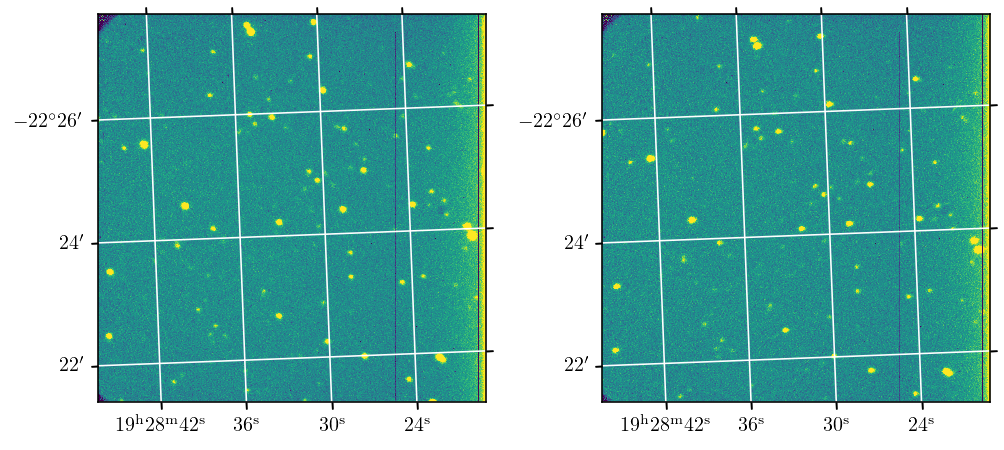

In [118]:
wcs_1 = WCS(pluto_1_header)

# Reproject the 2nd night image onto the coordinates of the 1st night, to account for small shifts in pointing
#pluto_2_img_rproj, footprint = reproject_interp((pluto_2_img, pluto_2_header), pluto_1_header)

fig, axes = plt.subplots(ncols=2, figsize=(8, 7), sharex=True, sharey=True, subplot_kw={'projection':wcs_1})
axes[0].set_aspect('equal', share=True)
plt.subplots_adjust(wspace=0.3)

vmin, vmax = zscale(pluto_1_img)
axes[0].imshow(pluto_1_img, interpolation = 'nearest', vmin=vmin, vmax=vmax, origin='lower')

vmin, vmax = zscale(pluto_2_img)
axes[1].imshow(pluto_2_img, interpolation = 'nearest', vmin=vmin, vmax=vmax, origin='lower')

[ax.grid(color='white', ls='solid', alpha=1.0) for ax in axes]

fig.savefig('pluto_comparison.png', dpi=300)

plt.show()